<a href="https://colab.research.google.com/github/csaitharun/UNP_CAPSTONE_PROJECT1/blob/main/Copy_of_Garment_worker_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Garment Worker**

#**Data Preprocessing**

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
df=pd.read_csv("/content/drive/MyDrive/garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01-01-2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,01-01-2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,01-01-2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,01-01-2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,01-01-2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,03-11-2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,03-11-2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,03-11-2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,03-11-2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [120]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [121]:
df.corr()

<ipython-input-121-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


In [122]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [123]:
df=df.drop(columns=["date"])

In [124]:
df[df.columns].nunique()

quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [125]:
df.shape

(1197, 14)

In [126]:
df.isna().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [127]:
df=df.drop(columns=['wip'])

In [128]:
duplicated =df[df.duplicated()]
print('Before dropping duplicates:', df.shape[0])
print('Number of duplicate rows:', len(duplicated))

Before dropping duplicates: 1197
Number of duplicate rows: 1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   idle_men               1197 non-null   int64  
 10  no_of_style_change     1197 non-null   int64  
 11  no_of_workers          1197 non-null   float64
 12  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(5), object(3)
memory usage: 121.7+ KB


In [130]:
df.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [131]:
df

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


In [132]:
df["department"]=df.department.replace(("finishing "), ("finishing"))

In [133]:
columns_to_encode = ['quarter', 'department',"day"]
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

In [134]:
df=df.drop(columns=["department_sweing","quarter_Quarter5"])

In [135]:
df

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,department_finishing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,...,0,0,0,0,0,0,0,1,0,0
1,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,...,0,0,0,1,0,0,0,1,0,0
2,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,...,0,0,0,0,0,0,0,1,0,0
3,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,...,0,0,0,0,0,0,0,1,0,0
4,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,960,0,0.0,0,0,8.0,0.628333,...,1,0,0,1,0,0,0,0,0,1
1193,8,0.70,3.90,960,0,0.0,0,0,8.0,0.625625,...,1,0,0,1,0,0,0,0,0,1
1194,7,0.65,3.90,960,0,0.0,0,0,8.0,0.625625,...,1,0,0,1,0,0,0,0,0,1
1195,9,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889,...,1,0,0,1,0,0,0,0,0,1


#**EDA(Exploratory Data Analysis)**

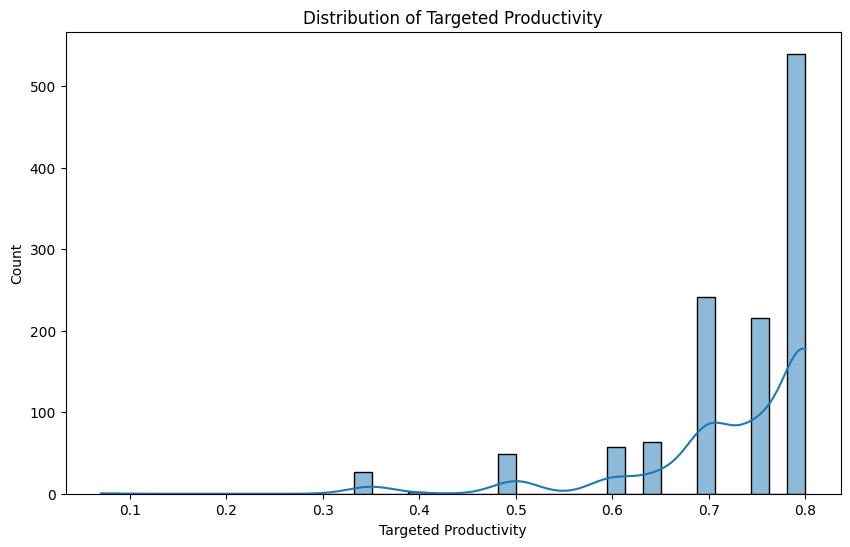

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(df['targeted_productivity'], kde=True)
plt.title('Distribution of Targeted Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Count')
plt.show()

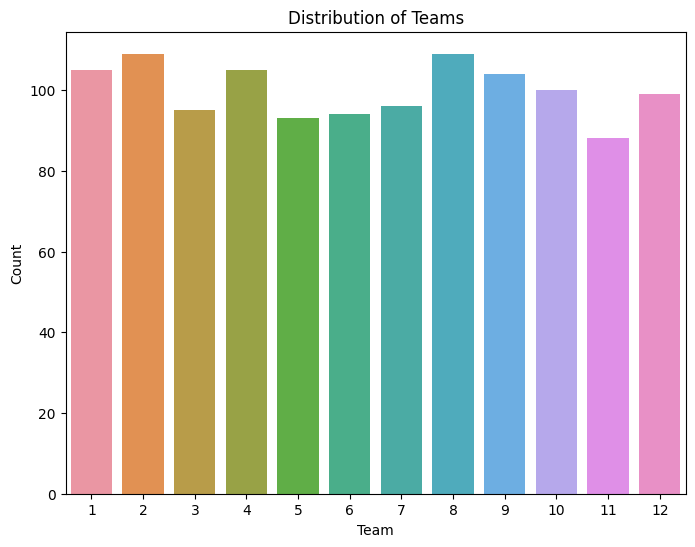

In [137]:
plt.figure(figsize=(8, 6))
sns.countplot(x='team', data=df)
plt.title('Distribution of Teams')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

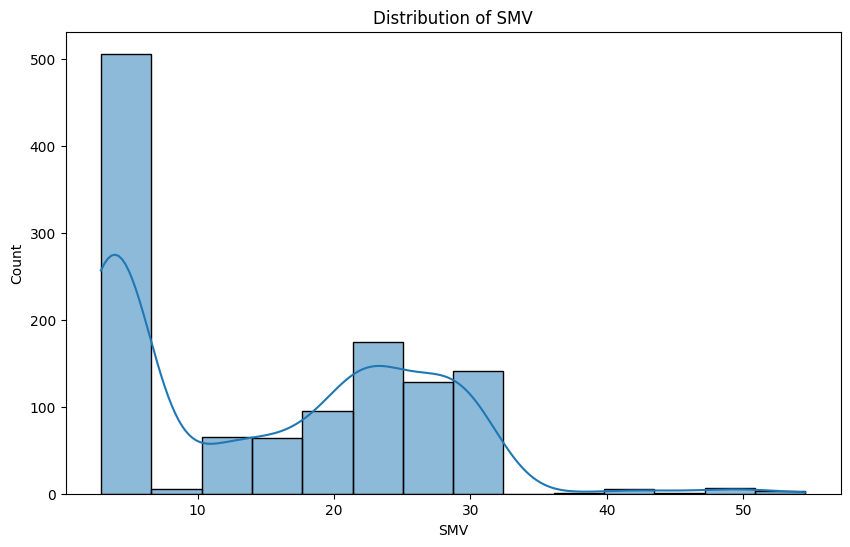

In [138]:
plt.figure(figsize=(10, 6))
sns.histplot(df['smv'], kde=True)
plt.title('Distribution of SMV')
plt.xlabel('SMV')
plt.ylabel('Count')
plt.show()

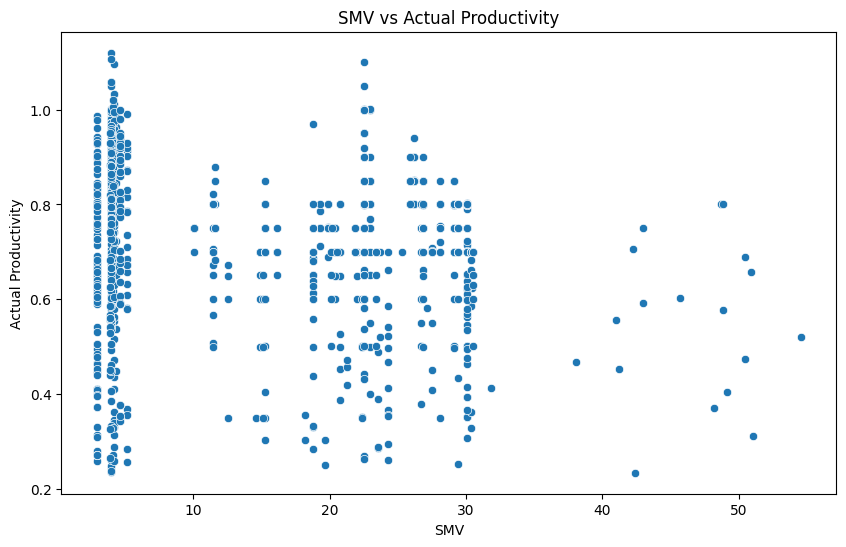

In [139]:

#Scatter Plot for 'smv' vs. 'actual_productivity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='smv', y='actual_productivity', data=df)
plt.title('SMV vs Actual Productivity')
plt.xlabel('SMV')
plt.ylabel('Actual Productivity')
plt.show()

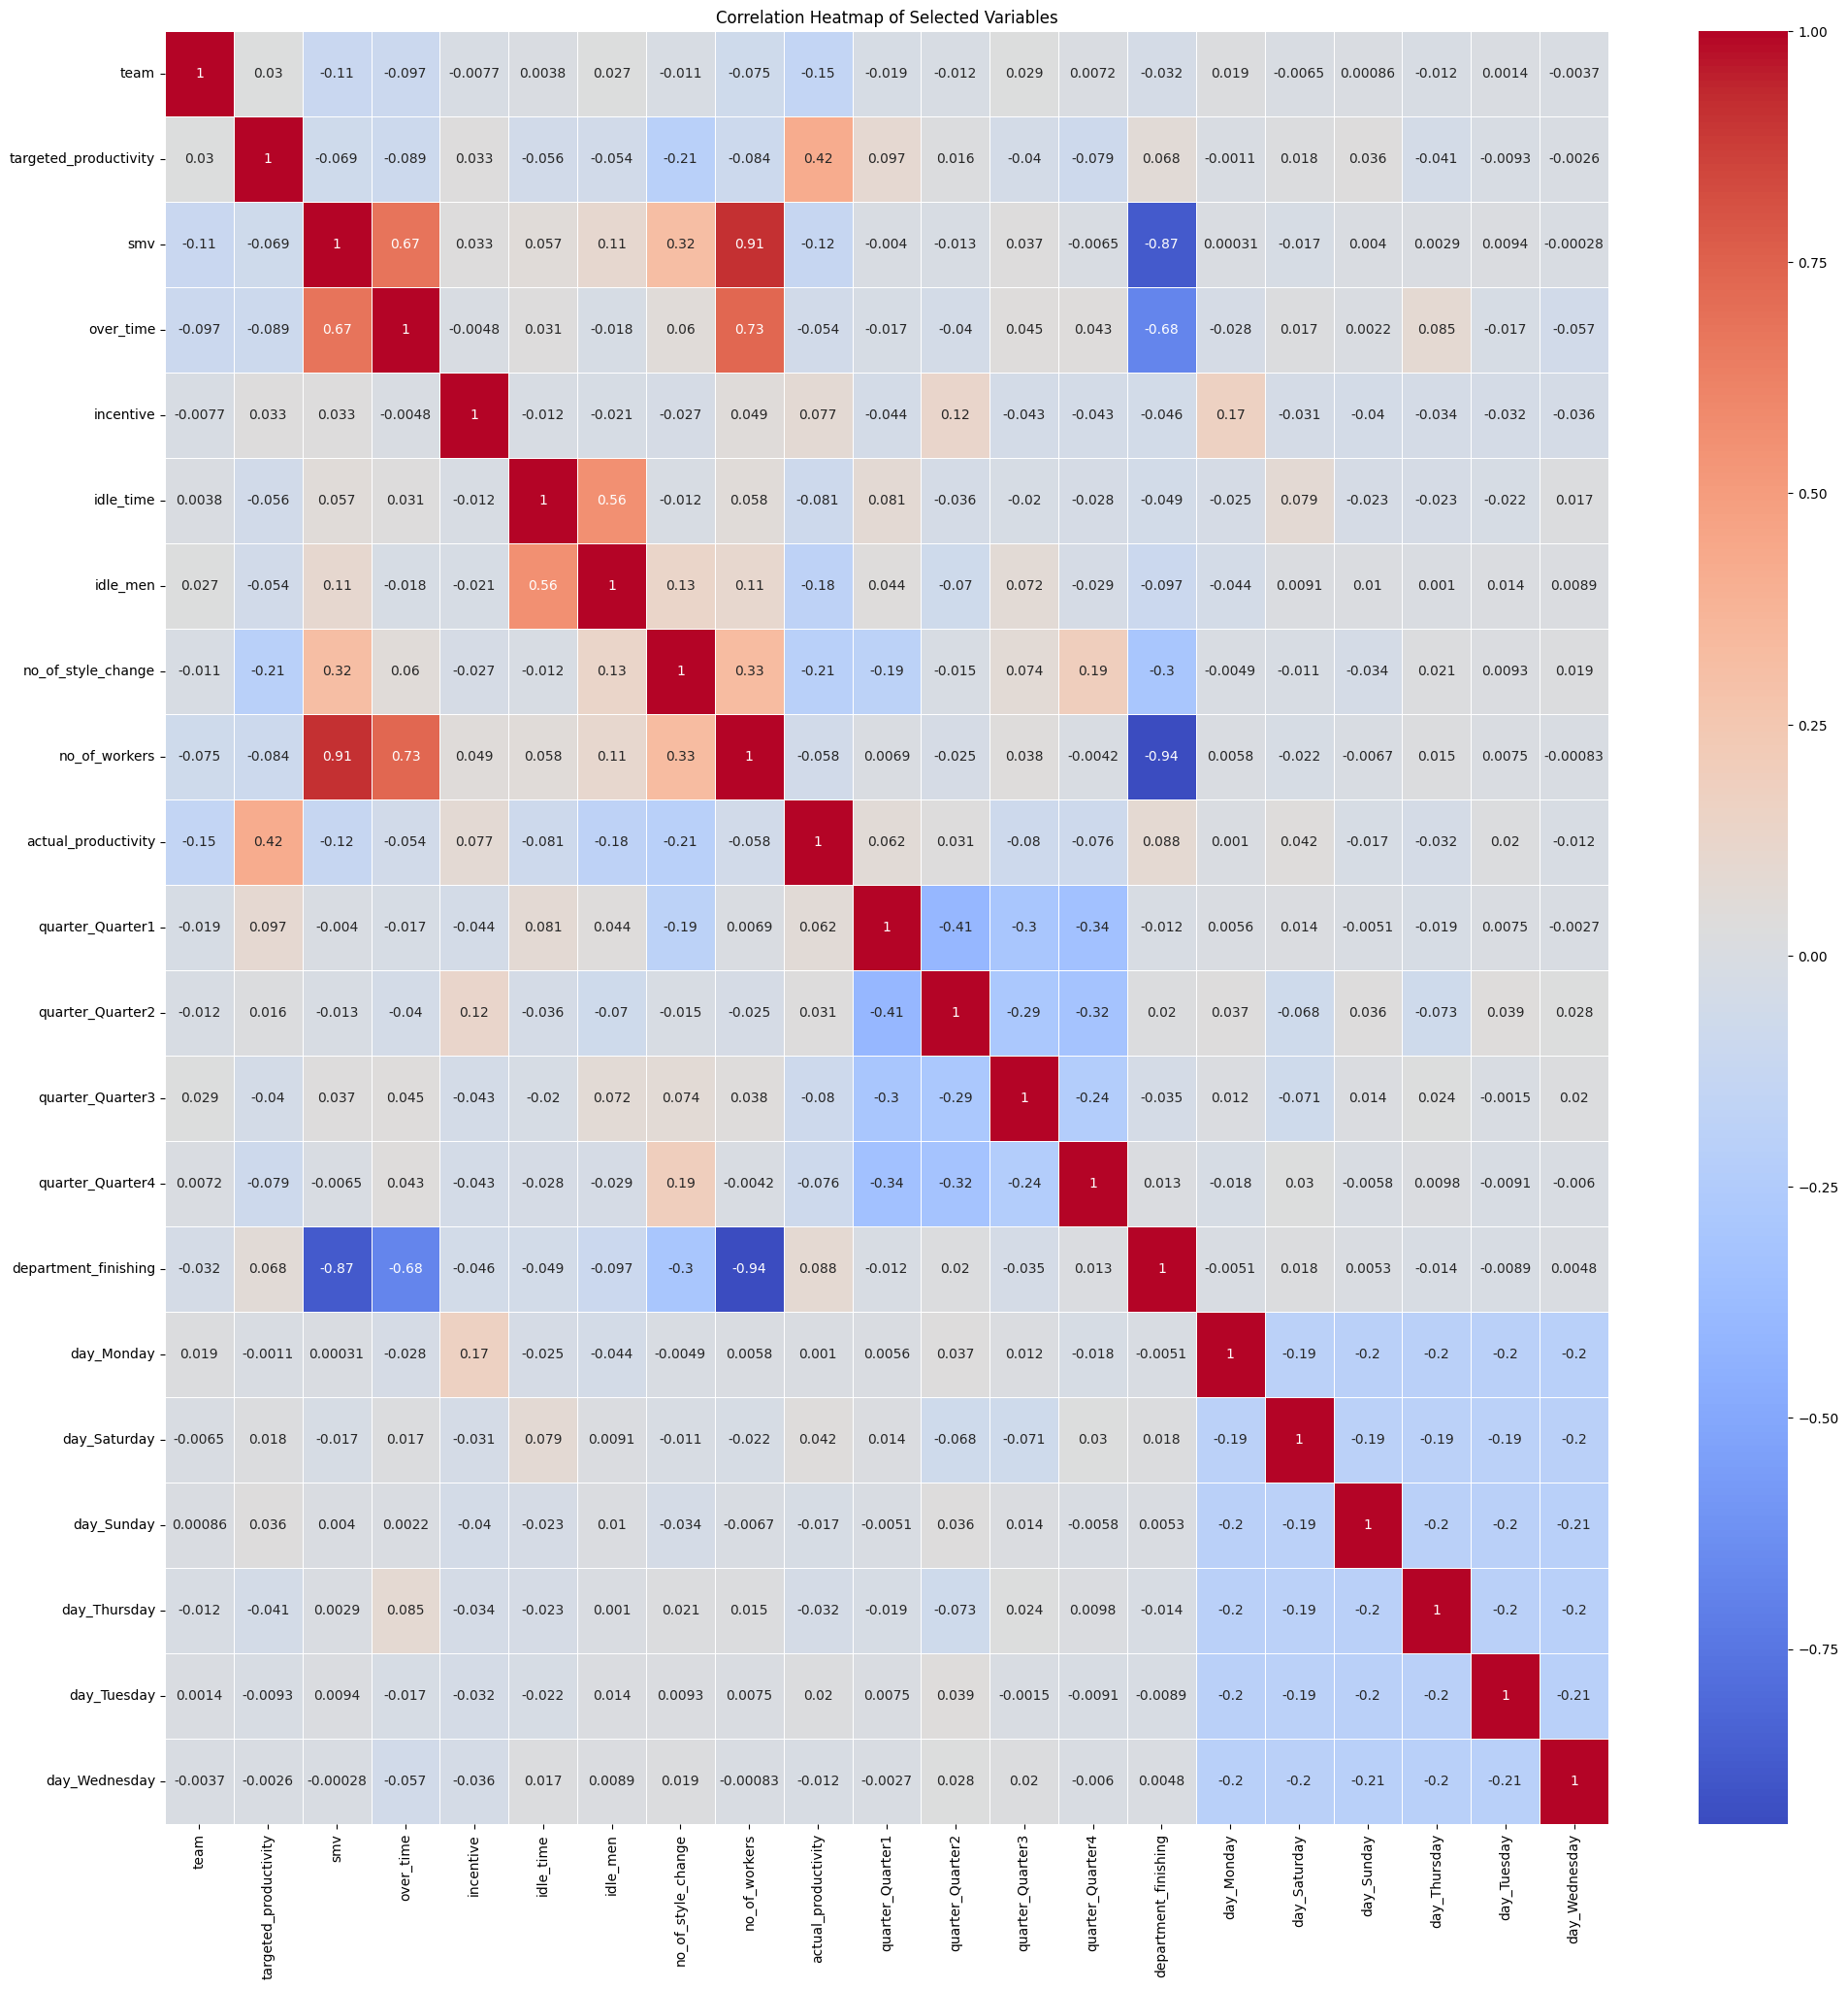

In [140]:
correlation_matrix = df.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()


#Linear Regression


In [141]:
x=df.drop(columns=["actual_productivity"],axis=1)
y=df['actual_productivity']

In [142]:
# Train and Test Data Splited Into 65:35 Ratio
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x,y,test_size=0.35,random_state=46)

In [143]:
print(x_train_1.shape)
print(y_train_1.shape)
print(x_test_1.shape)
print(y_test_1.shape)

(778, 20)
(778,)
(419, 20)
(419,)


In [144]:
reg=linear_model.LinearRegression()

In [145]:
reg.fit(x_train_1,y_train_1)

LinearRegression()

In [146]:
prediction_1=reg.predict(x_test_1)

In [147]:
mse=mean_squared_error(y_test_1,prediction_1)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_1,prediction_1)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.02224636817461375
Mean Absolute Error: 0.10787819070889294
Root Mean Squared Error : 0.14915216449858765


In [148]:
r2=r2_score(y_test_1,prediction_1)
print("R2 score:",r2)

R2 score: 0.27050323331171255


In [149]:
# Train and Test Data Splited Into 70:30 Ratio
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x,y,test_size=0.30,random_state=85)

In [150]:
print(x_train_2.shape)
print(y_train_2.shape)
print(x_test_2.shape)
print(y_test_2.shape)

(837, 20)
(837,)
(360, 20)
(360,)


In [151]:
reg=linear_model.LinearRegression()

In [152]:
reg.fit(x_train_2,y_train_2)

LinearRegression()

In [153]:
prediction_2=reg.predict(x_test_2)

In [154]:
mse=mean_squared_error(y_test_2,prediction_2)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_2,prediction_2)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.022196716987272772
Mean Absolute Error: 0.1115400800064401
Root Mean Squared Error : 0.1489856267808166


In [155]:
r2=r2_score(y_test_2,prediction_2)
print("R2 score:",r2)

R2 score: 0.25802205935431033


In [156]:
# Train and Test Data Splited Into 75:25 Ratio
x_train_3,x_test_3,y_train_3,y_test_3=train_test_split(x,y,test_size=0.25,random_state=45)

In [157]:
print(x_train_3.shape)
print(y_train_3.shape)
print(x_test_3.shape)
print(y_test_3.shape)

(897, 20)
(897,)
(300, 20)
(300,)


In [158]:
reg=linear_model.LinearRegression()

In [159]:
reg.fit(x_train_3,y_train_3)

LinearRegression()

In [160]:
prediction_3=reg.predict(x_test_3)

In [161]:
mse=mean_squared_error(y_test_3,prediction_3)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_3,prediction_3)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.021144220583394865
Mean Absolute Error: 0.10390524025631821
Root Mean Squared Error : 0.14541052432129822


In [162]:
r2=r2_score(y_test_3,prediction_3)
print("R2 score:",r2)

R2 score: 0.2766153706792208


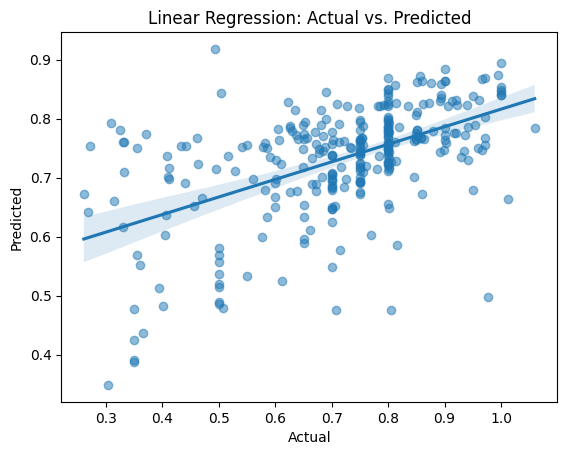

In [163]:
sns.regplot(x=y_test_3, y=prediction_3, scatter_kws={'alpha': 0.5})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

In [164]:
# Train and Test Data Splited Into 80:20 Ratio
x_train_4,x_test_4,y_train_4,y_test_4=train_test_split(x,y,test_size=0.20,random_state=25)

In [165]:
print(x_train_4.shape)
print(y_train_4.shape)
print(x_test_4.shape)
print(y_test_4.shape)

(957, 20)
(957,)
(240, 20)
(240,)


In [166]:
reg=linear_model.LinearRegression()

In [167]:
reg.fit(x_train_4,y_train_4)

LinearRegression()

In [168]:
prediction_4=reg.predict(x_test_4)

In [169]:
mse=mean_squared_error(y_test_4,prediction_4)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_4,prediction_4)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.023283351169795578
Mean Absolute Error: 0.11326845412712837
Root Mean Squared Error : 0.152588830422792


In [170]:
r2=r2_score(y_test_4,prediction_4)
print("R2 score:",r2)

R2 score: 0.2172185140791827


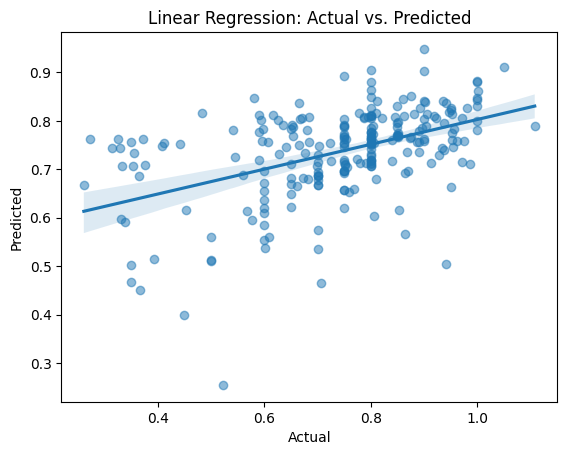

In [171]:
sns.regplot(x=y_test_4, y=prediction_4, scatter_kws={'alpha': 0.5})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

# Decision Tree Regressor






In [172]:
# Train and Test Data Splited Into 65:35 Ratio
regressor=DecisionTreeRegressor(criterion="friedman_mse",max_depth=10,min_samples_split=10,random_state=5)  #{'friedman_mse', 'poisson', 'squared_error', 'absolute_error'}

In [173]:
regressor.fit(x_test_1,y_test_1)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10, random_state=5)

In [174]:
y_predicted_1=regressor.predict(x_test_1)

In [175]:
y_predicted_1[1:5]

array([0.75043503, 0.74698884, 0.78353878, 0.36605352])

In [176]:
mse=mean_squared_error(y_test_1,y_predicted_1)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_1,y_predicted_1)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.006414984992000257
Mean Absolute Error: 0.047885743093709965
Root Mean Squared Error : 0.08009360144231409


In [177]:
r2=r2_score(y_test_1,y_predicted_1)
print("R2 score :",r2)

R2 score : 0.7896415822444991


In [178]:
cross_val_score(regressor,x_test_1,y_test_1,cv=10)      #cross validation

array([ 0.21621922,  0.14488959, -0.19759542,  0.25643902,  0.28172453,
        0.23591394,  0.15232664,  0.44658342,  0.25620009, -0.3910191 ])

In [179]:
# Train and Test Data Splited Into 70:30 Ratio
regressor=DecisionTreeRegressor(criterion="friedman_mse",max_depth=10,min_samples_split=10,random_state=5)  #{'friedman_mse', 'poisson', 'squared_error', 'absolute_error'}

In [180]:
regressor.fit(x_test_2,y_test_2)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10, random_state=5)

In [181]:
y_predicted_2=regressor.predict(x_test_2)

In [182]:
y_predicted_2[1:5]

array([0.66096524, 0.70044   , 0.8485846 , 0.52256944])

In [183]:
mse=mean_squared_error(y_test_2,y_predicted_2)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_2,y_predicted_2)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.006980778977963683
Mean Absolute Error: 0.05351584244089093
Root Mean Squared Error : 0.08355105611519033


In [184]:
r2=r2_score(y_test_2,y_predicted_2)
print("R2 score :",r2)

R2 score : 0.7666508964752714


In [185]:
cross_val_score(regressor,x_test_2,y_test_2,cv=10)      #cross validation

array([-0.15578278,  0.41578378,  0.22686519, -0.39241755,  0.65909663,
       -0.18202871,  0.13297715,  0.00801543,  0.47004361,  0.13882444])

In [186]:
# Train and Test Data Splited Into 75:25 Ratio
regressor=DecisionTreeRegressor(criterion="friedman_mse",max_depth=10,min_samples_split=10,random_state=5)  #{'friedman_mse', 'poisson', 'squared_error', 'absolute_error'}

In [187]:
regressor.fit(x_test_3,y_test_3)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10, random_state=5)

In [188]:
y_predicted_3=regressor.predict(x_test_3)

In [189]:
y_predicted_3[1:5]

array([0.90030572, 0.62537288, 0.51513889, 0.87858932])

In [190]:
mse=mean_squared_error(y_test_3,y_predicted_3)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_3,y_predicted_3)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.0076210128222632505
Mean Absolute Error: 0.05528241342879324
Root Mean Squared Error : 0.08729841248420987


In [191]:
r2=r2_score(y_test_3,y_predicted_3)
print("R2 score :",r2)

R2 score : 0.7392704302464923


In [192]:
cross_val_score(regressor,x_test_3,y_test_3,cv=10)      #cross validation

array([-0.39665171, -0.04152237,  0.15684085,  0.09839745, -0.04553914,
        0.49304155,  0.2948812 , -0.40479146,  0.29129444,  0.15538358])

In [193]:
# Train and Test Data Splited Into 80:20 Ratio
regressor=DecisionTreeRegressor(criterion="friedman_mse",max_depth=10,min_samples_split=10,random_state=5)  #{'friedman_mse', 'poisson', 'squared_error', 'absolute_error'}

In [194]:
regressor.fit(x_test_4,y_test_4)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10, random_state=5)

In [195]:
y_predicted_4=regressor.predict(x_test_4)

In [196]:
y_predicted_4[1:5]

array([0.89774635, 0.91165544, 0.90065055, 0.64668299])

In [197]:
mse=mean_squared_error(y_test_4,y_predicted_4)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_4,y_predicted_4)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.006583503608811523
Mean Absolute Error: 0.050610176277351045
Root Mean Squared Error : 0.08113879225630317


In [198]:
r2=r2_score(y_test_4,y_predicted_4)
print("R2 score :",r2)

R2 score : 0.7786639603599728


In [199]:
cross_val_score(regressor,x_test_4,y_test_4,cv=10)      #cross validation

array([ 0.27838736, -0.42544004, -0.35545237, -0.23306806,  0.38611756,
       -2.69239297,  0.4840831 ,  0.43250523,  0.36950417,  0.16111697])

#Random Forest Regressor


In [200]:
# Train and Test Data Splited Into 65:35 Ratio
rf=RandomForestRegressor()

In [201]:
rf.fit(x_train_1,y_train_1)

RandomForestRegressor()

In [202]:
y_pred_1=rf.predict(x_test_1)

In [203]:
y_pred_1[1:20]

array([0.74048309, 0.81134747, 0.84274841, 0.57615337, 0.63149545,
       0.54001381, 0.7922386 , 0.77284579, 0.553075  , 0.67391769,
       0.69633113, 0.85395302, 0.6145027 , 0.55082232, 0.75155682,
       0.6199873 , 0.5385498 , 0.89365915, 0.76451868])

In [204]:
mse=mean_squared_error(y_test_1,y_pred_1)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_1,y_pred_1)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.014356469486763565
Mean Absolute Error: 0.07642660044112172
Root Mean Squared Error : 0.11981848558032923


In [205]:
r2=r2_score(y_test_1,y_pred_1)
print("R2 score :",r2)

R2 score : 0.5292266140050559


In [206]:
cross_val_score(regressor,x_test_1,y_test_1,cv=10)      #cross validation

array([ 0.21621922,  0.14488959, -0.19759542,  0.25643902,  0.28172453,
        0.23591394,  0.15232664,  0.44658342,  0.25620009, -0.3910191 ])

In [207]:
# Train and Test Data Splited Into 70:30 Ratio
rf=RandomForestRegressor()

In [208]:
rf.fit(x_train_2,y_train_2)

RandomForestRegressor()

In [209]:
y_pred_2=rf.predict(x_test_2)

In [210]:
y_predicted_2[1:20]

array([0.66096524, 0.70044   , 0.8485846 , 0.52256944, 0.49675129,
       0.65979324, 0.79085703, 0.64684028, 0.93999636, 0.79085703,
       0.61462847, 0.79085703, 0.93999636, 0.49675129, 0.79495934,
       0.71138942, 0.79541667, 0.97526495, 0.3725853 ])

In [211]:
mse=mean_squared_error(y_test_2,y_pred_2)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_2,y_pred_2)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.015794421450731108
Mean Absolute Error: 0.07638732517105556
Root Mean Squared Error : 0.12567585866319397


In [212]:
r2=r2_score(y_test_2,y_pred_2)
print("R2 score :",r2)

R2 score : 0.4720339810421912


In [213]:
# Train and Test Data Splited Into 75:25 Ratio
rf=RandomForestRegressor()

In [214]:
rf.fit(x_train_3,y_train_3)

RandomForestRegressor()

In [215]:
y_pred_3=rf.predict(x_test_3)

In [216]:
y_pred_3[1:20]

array([0.92445957, 0.61416219, 0.53977278, 0.81001758, 0.36246787,
       0.41167796, 0.79460344, 0.75636501, 0.80306873, 0.87959838,
       0.58794407, 0.69224284, 0.8095859 , 0.71934865, 0.79662953,
       0.43365556, 0.65354762, 0.85705992, 0.67539201])

In [217]:
mse=mean_squared_error(y_test_3,y_pred_3)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_3,y_pred_3)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.011485390229968919
Mean Absolute Error: 0.0667804509042
Root Mean Squared Error : 0.10716991289521942


In [218]:
r2=r2_score(y_test_3,y_pred_3)
print("R2 score :",r2)

R2 score : 0.6070626145172102


In [219]:
# Train and Test Data Splited Into 80:20 Ratio
rf=RandomForestRegressor()

In [220]:
rf.fit(x_train_4,y_train_4)

RandomForestRegressor()

In [221]:
y_pred_4=rf.predict(x_test_4)

In [222]:
y_pred_4[1:20]

array([0.76214149, 0.88879769, 0.89182809, 0.57693313, 0.67954111,
       0.68702894, 0.80116796, 0.9455636 , 0.57899253, 0.38611812,
       0.75720458, 0.7994856 , 0.90841152, 0.60039218, 0.57252892,
       0.76258642, 0.800393  , 0.72892458, 0.88732994])

In [223]:
mse=mean_squared_error(y_test_4,y_pred_4)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_4,y_pred_4)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.013359443335214416
Mean Absolute Error: 0.07347715026895832
Root Mean Squared Error : 0.11558305816690617


In [224]:
r2=r2_score(y_test_4,y_pred_4)
print("R2 score :",r2)

R2 score : 0.5508582579564334


#KNN Regressor

In [225]:
# Train and Test Data Splited Into 65:35 Ratio
knn_regressor = KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(x_train_1,y_train_1)

KNeighborsRegressor(n_neighbors=11)

In [226]:
y_pred_1=knn_regressor.predict(x_test_1)

In [227]:
y_pred_1[1:20]

array([0.73574131, 0.72757008, 0.86435505, 0.88407121, 0.66634914,
       0.47021186, 0.7389558 , 0.83075379, 0.66187704, 0.67357094,
       0.69625592, 0.79570655, 0.53643712, 0.67474621, 0.7111116 ,
       0.57402308, 0.75279933, 0.84377803, 0.65849587])

In [228]:
mse=mean_squared_error(y_test_1,y_pred_1)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_1,y_pred_1)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.02432990666299022
Mean Absolute Error: 0.10991834811347363
Root Mean Squared Error : 0.15598046885103986


In [229]:
r2=r2_score(y_test_1,y_pred_1)
print("R2 score :",r2)

R2 score : 0.202180414116636


In [230]:
# Train and Test Data Splited Into 70:30 Ratio
knn_regressor = KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(x_train_2,y_train_2)

KNeighborsRegressor(n_neighbors=11)

In [231]:
y_pred_2=knn_regressor.predict(x_test_2)

In [232]:
y_pred_2[1:20]

array([0.69316795, 0.76850637, 0.85654787, 0.47626641, 0.697747  ,
       0.62615152, 0.81380102, 0.69316795, 0.8470101 , 0.64076982,
       0.80705758, 0.77765232, 0.80511111, 0.53786515, 0.68312855,
       0.78937171, 0.80720023, 0.98658192, 0.71571051])

In [233]:
mse=mean_squared_error(y_test_2,y_pred_2)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_2,y_pred_2)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.023075918607524226
Mean Absolute Error: 0.11054833995631314
Root Mean Squared Error : 0.15190759891303734


In [234]:
r2=r2_score(y_test_2,y_pred_2)
print("R2 score :",r2)

R2 score : 0.22863265875148364


In [235]:
# Train and Test Data Splited Into 75:35 Ratio
knn_regressor = KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(x_train_3,y_train_3)

KNeighborsRegressor(n_neighbors=11)

In [236]:
y_pred_3=knn_regressor.predict(x_test_3)

In [237]:
y_pred_3[1:20]

array([0.76833412, 0.73967757, 0.83178788, 0.89579373, 0.71338755,
       0.60502652, 0.79128948, 0.78201275, 0.70408372, 0.77698747,
       0.63303489, 0.7543966 , 0.76348706, 0.72799996, 0.71310801,
       0.64216911, 0.85284508, 0.86295084, 0.68333957])

In [238]:
mse=mean_squared_error(y_test_3,y_pred_3)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_3,y_pred_3)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.021846764432336664
Mean Absolute Error: 0.10226545745666665
Root Mean Squared Error : 0.14780651011486828


In [239]:
r2=r2_score(y_test_3,y_pred_3)
print("R2 score :",r2)

R2 score : 0.2525799885404503


In [240]:
# Train and Test Data Splited Into 80:20 Ratio
knn_regressor = KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(x_train_4,y_train_4)

KNeighborsRegressor(n_neighbors=11)

In [241]:
y_pred_4=knn_regressor.predict(x_test_4)

In [242]:
y_pred_4[1:20]

array([0.89837758, 0.77827322, 0.87931439, 0.68004655, 0.69177083,
       0.69589197, 0.82303635, 0.96388113, 0.63420415, 0.4773649 ,
       0.77287117, 0.8049582 , 0.5999934 , 0.67018561, 0.63873786,
       0.69055678, 0.8049582 , 0.64651345, 0.84041212])

In [243]:
mse=mean_squared_error(y_test_4,y_pred_4)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_4,y_pred_4)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 0.022058954899638827
Mean Absolute Error: 0.10333571839924244
Root Mean Squared Error : 0.14852257370392835


In [244]:
r2=r2_score(y_test_4,y_pred_4)
print("R2 score :",r2)

R2 score : 0.25838246529564424


#SVM Regressor

In [245]:
# Train and Test Data Splited Into 65:35 Ratio
model=SVR(kernel="linear")

In [ ]:
model.fit(x_train_1,y_train_1)

In [ ]:
y_pred_1=model.predict(x_test_1)

In [ ]:
mse=mean_squared_error(y_test_1,y_pred_1)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_1,y_pred_1)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

In [ ]:




model.score(x_test_1,y_test_1)

In [ ]:
# Train and Test Data Splited Into 70:30 Ratio
model=SVR(C=200,kernel="linear")

In [ ]:
# @title Default title text
model.fit(x_train_2,y_train_2)

In [ ]:
y_pred_2=model.predict(x_test_2)

In [ ]:
mse=mean_squared_error(y_test_2,y_pred_2)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_2,y_pred_2)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

In [ ]:
model.score(x_test_2,y_test_2)

In [ ]:
# Train and Test Data Splited Into 75:35 Ratio
model=SVR(C=200,kernel="linear")

In [ ]:
model.fit(x_train_3,y_train_3)

In [ ]:
y_pred_3=model.predict(x_test_3)

In [ ]:
mse=mean_squared_error(y_test_3,y_pred_3)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_3,y_pred_3)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

In [ ]:
model.score(x_test_3,y_test_3)

In [ ]:
# Train and Test Data Splited Into 80:20 Ratio
model=SVR(C=200,kernel="linear")

In [ ]:
model.fit(x_train_4,y_train_4)

In [ ]:
y_pred_4=model.predict(x_test_4)

In [ ]:
mse=mean_squared_error(y_test_4,y_pred_4)
print("Mean Squared Error :",mse)
mae = mean_absolute_error(y_test_4,y_pred_4)
print("Mean Absolute Error:", mae)
rmse=np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

In [ ]:
model.score(x_test_4,y_test_4)